# Experiments
Note: Functions in this file has not been edited.


In [1]:
from sklearn import metrics

def clustring_eval(x, y):
    """
    :param x: clustering predicted vector
    :param y: clustering true vectors
    """
    return {
        'rand': metrics.rand_score(y, x),
        'adjusted_rand': metrics.adjusted_rand_score(y, x),
        'adjusted_mutual_info': metrics.adjusted_mutual_info_score(y, x),
        'homogeneity': metrics.homogeneity_score(y, x),
        'completeness': metrics.completeness_score(y, x),
        'v_measure': metrics.v_measure_score(y, x),
        'fowlkes_mallows': metrics.fowlkes_mallows_score(y, x),
        # other measures, like https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient can not be used
        #   becuase we don't know the feaure vecotrs.
    }

## Loading different methods

In [2]:
!git clone https://github.com/sadrasabouri/iFairNMTF

Cloning into 'iFairNMTF'...
remote: Enumerating objects: 234, done.
remote: Counting objects: 100% (113/113), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 234 (delta 52), reused 13 (delta 5), pack-reused 121
Receiving objects: 100% (234/234), 16.48 MiB | 15.35 MiB/s, done.
Resolving deltas: 100% (108/108), done.


In [2]:
%cd iFairNMTF

/content/iFairNMTF


In [4]:
!pip install -r Source/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 84.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 92.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 M

### Siamak Ghodis's

In [3]:
from Source.algorithms import iFairNMTF
from Source.algorithms import ind_fair_sc
from Source.algorithms import group_fair_sc
from Source.algorithms import normal_sc

### Ours

In [4]:
import numpy as np
np.random.seed(0)
N1 = 20 # size of 1st cluster
N2 = 20 # size of 2nd cluster
N = N1 + N2
ONE_ONET = np.ones((N, N))

In [5]:
def cluster_using_EVD(M):
    """
    :param M: in-trace matrix
    """
    eigenvalues, eigenvectors = np.linalg.eig(M)
    # Changed to 1, 0 was trivial answer
    return (eigenvectors.T[1] > 0) * 2 - 1

def defualt_clustring_EVD(A, lambda_=1):
    """
    :param A: Adjacency matrix
    """
    return cluster_using_EVD(A + lambda_ * ONE_ONET)

def fair_clustering_EVD(A, s, mu=1, lambda_=1):
    return defualt_clustring_EVD(A + mu * s.reshape((N, 1)) @ s.reshape((N, 1)).T, lambda_=lambda_)

In [6]:
import numpy as np

np.random.seed(0)

N = N1 + N2
p_inter = 0.05 # inter-cluster connection probablity
p_intera = 0.90 # intera-cluster connection probability
s = np.random.choice([-1, 1], size=(N,)) # specificity vector

def get_random_sym_nonloop_adj(n, p):
    A = np.zeros((n, n), dtype=np.float64)
    for i in range(n):
        for j in range(i + 1, n):
            is_connected = int((np.random.rand() < p) * 1)
            A[i, j] = is_connected
            A[j, i] = is_connected
    return A


def get_sparse_matrix(p, size):
    """
    :param p: inter-cluster connection probablity
    """
    return np.random.binomial(
        1,
        [[p for i in range(size[1])] for j in range(size[0])],
        size=size)

A0 = get_random_sym_nonloop_adj(N1, p_intera)
A1 = get_sparse_matrix(p_inter, size=(N1, N2))
A2 = get_random_sym_nonloop_adj(N2, p_intera)

A = np.block([
    [A0, A1],
    [A1.T, A2]
    ])
A = np.array(A, dtype=np.float32)
print(A)
print(s)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]
[-1  1  1 -1  1  1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1
 -1  1  1  1  1 -1  1 -1  1 -1  1  1 -1  1  1 -1]


sklearn.clustering.SpectralClustering
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
Normal SC:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
Group Fair SC:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0]
Individual Fair SC:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
iFairNMTF:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
Ours:
[1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1
 0 0 1]


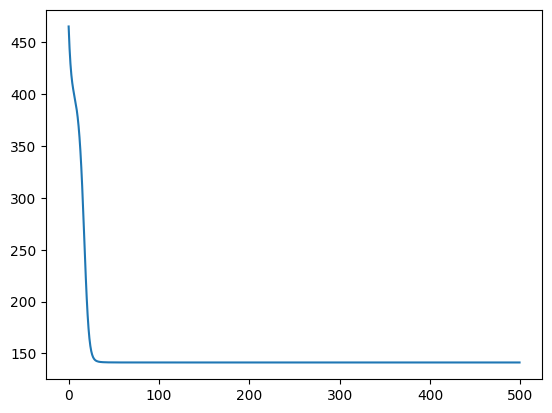

In [7]:
import torch
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(2, affinity='precomputed', n_init=100)
sc.fit(A)
print('sklearn.clustering.SpectralClustering')
print(sc.labels_)

s_ = np.array((s+1)//2)
print("Normal SC:")
print(normal_sc(A, 2))
print("Group Fair SC:")
print(group_fair_sc(A, s_, 2))
print("Individual Fair SC:")
print(ind_fair_sc(A, s_, 2))
print("iFairNMTF:")
print(iFairNMTF(torch.from_numpy(A),
                torch.from_numpy(s_),
                2,
                0))
y_hat = fair_clustering_EVD(A, s, 1.4)
y_hat = np.array((y_hat+1)//2)
print("Ours:")
print(y_hat)

In [8]:
s

array([-1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1,
       -1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,
        1,  1, -1,  1,  1, -1])

100%|██████████| 100/100 [00:02<00:00, 49.52it/s]


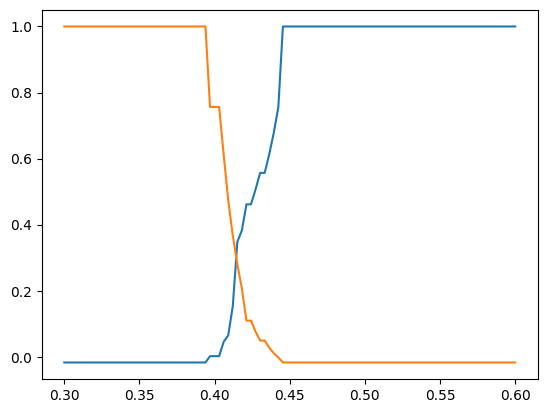

In [9]:
from tqdm import tqdm
import matplotlib.pyplot as plt

LAMBDAS = np.linspace(0.3, 0.6, 100)
SPECs_ours = {
        'rand': [],
        'adjusted_rand': [],
        'adjusted_mutual_info': [],
        'homogeneity': [],
        'completeness': [],
        'v_measure': [],
        'fowlkes_mallows': [],
    }
TEMPs_ours = {
        'rand': [],
        'adjusted_rand': [],
        'adjusted_mutual_info': [],
        'homogeneity': [],
        'completeness': [],
        'v_measure': [],
        'fowlkes_mallows': [],
    }

for LAMBDA in tqdm(LAMBDAS):
    x = fair_clustering_EVD(A, s, mu=LAMBDA, lambda_=1)
    temp = clustring_eval(x, [*[1]*N1, *[-1]*N2])
    spec = clustring_eval(x, s)

    for metric in temp.keys():
        TEMPs_ours[metric].append(temp[metric])
        SPECs_ours[metric].append(spec[metric])
plt.plot(LAMBDAS, SPECs_ours['adjusted_mutual_info'])
plt.plot(LAMBDAS, TEMPs_ours['adjusted_mutual_info'])

100%|██████████| 100/100 [00:18<00:00,  5.33it/s]


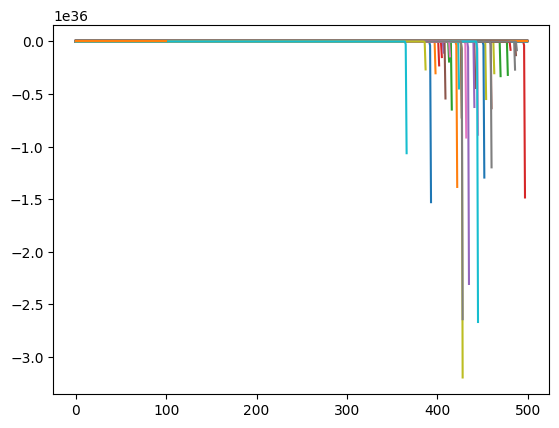

In [10]:
from tqdm import tqdm
LAMBDAS = np.linspace(0, 100, 100)
SPECs_ifair = {
        'rand': [],
        'adjusted_rand': [],
        'adjusted_mutual_info': [],
        'homogeneity': [],
        'completeness': [],
        'v_measure': [],
        'fowlkes_mallows': [],
    }
TEMPs_ifair = {
        'rand': [],
        'adjusted_rand': [],
        'adjusted_mutual_info': [],
        'homogeneity': [],
        'completeness': [],
        'v_measure': [],
        'fowlkes_mallows': [],
    }
for LAMBDA in tqdm(LAMBDAS):
    x = iFairNMTF(torch.from_numpy(A),
                torch.from_numpy(s_),
                2,
                LAMBDA)
    temp = clustring_eval(x, [*[1]*N1, *[-1]*N2])
    spec = clustring_eval(x, s)
    for metric in temp.keys():
        TEMPs_ifair[metric].append(temp[metric])
        SPECs_ifair[metric].append(spec[metric])
plt.plot(LAMBDAS, SPECs_ifair['adjusted_mutual_info'])
plt.plot(LAMBDAS, TEMPs_ifair['adjusted_mutual_info'])

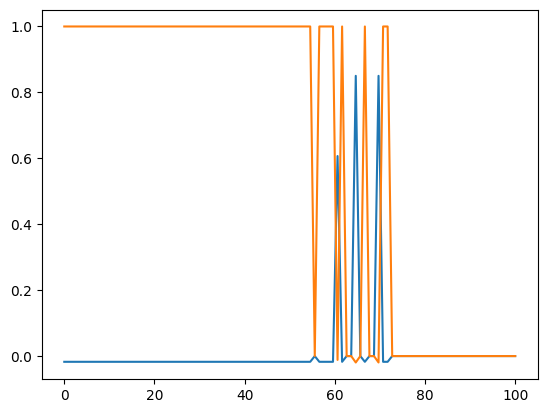

In [11]:
plt.plot(LAMBDAS, SPECs_ifair['adjusted_mutual_info'])
plt.plot(LAMBDAS, TEMPs_ifair['adjusted_mutual_info'])

In [12]:
x = normal_sc(A, 2)
TEMPs_normalsc = clustring_eval(x, [*[1]*N1, *[-1]*N2])
SPECs_normalsc = clustring_eval(x, s)

In [13]:
x = group_fair_sc(A, s_, 2)
TEMPs_gfairsc = clustring_eval(x, [*[1]*N1, *[-1]*N2])
SPECs_gfairsc = clustring_eval(x, s)

In [14]:
x = ind_fair_sc(A, s_, 2)
TEMPs_ifairsc = clustring_eval(x, [*[1]*N1, *[-1]*N2])
SPECs_ifairsc = clustring_eval(x, s)

In [15]:
for metric in SPECs_ours.keys():
    SPECs_ours[metric] = np.array(SPECs_ours[metric])
    TEMPs_ours[metric] = np.array(TEMPs_ours[metric])

    SPECs_ifair[metric] = np.array(SPECs_ifair[metric])
    TEMPs_ifair[metric] = np.array(TEMPs_ifair[metric])

    TEMPs_normalsc[metric] = np.array(TEMPs_normalsc[metric])
    SPECs_normalsc[metric] = np.array(SPECs_normalsc[metric])

    TEMPs_gfairsc[metric] = np.array(TEMPs_gfairsc[metric])
    SPECs_gfairsc[metric] = np.array(SPECs_gfairsc[metric])

    TEMPs_ifairsc[metric] = np.array(TEMPs_ifairsc[metric])
    SPECs_ifairsc[metric] = np.array(SPECs_ifairsc[metric])

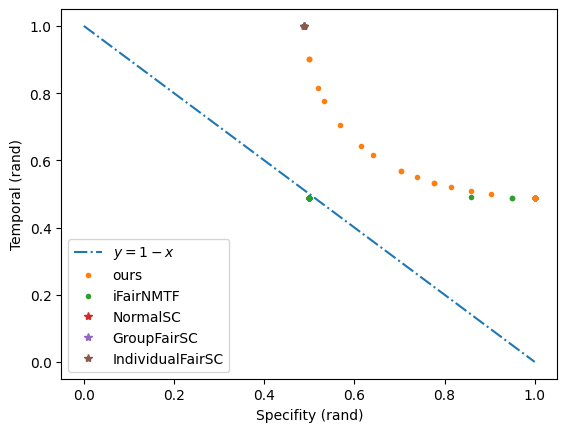

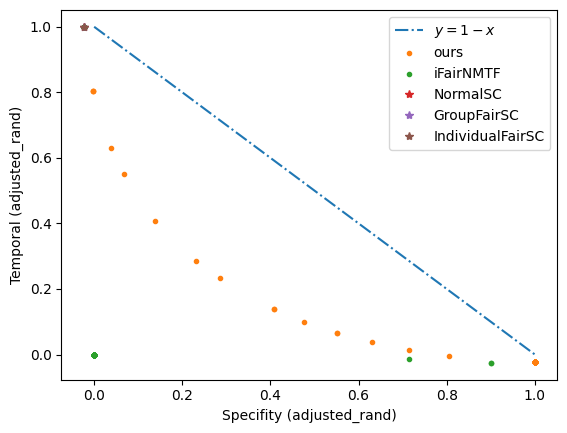

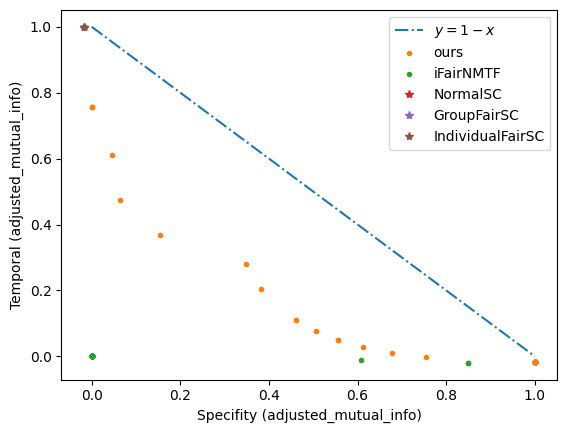

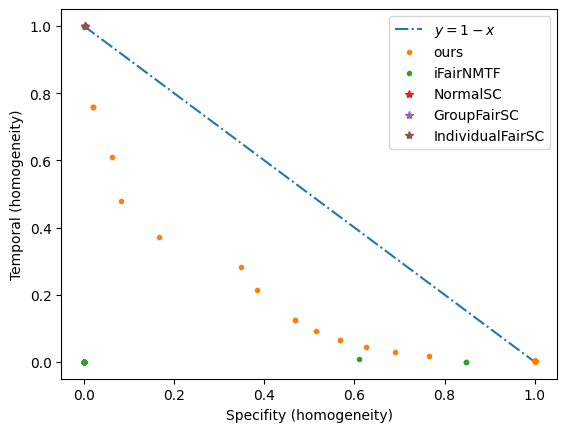

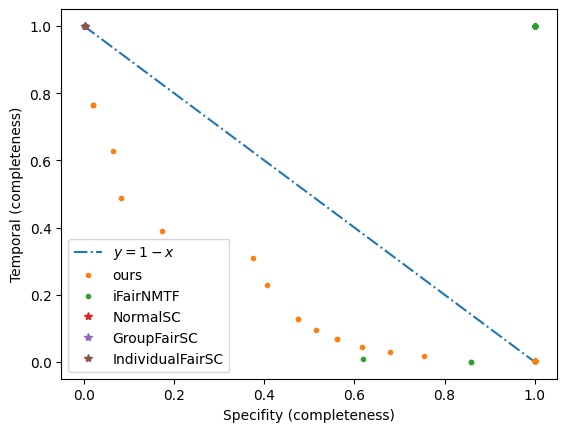

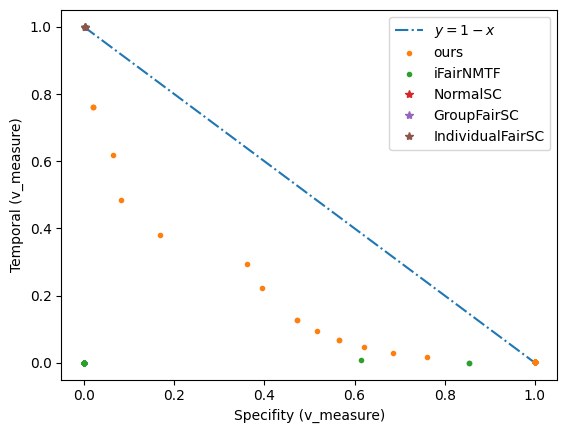

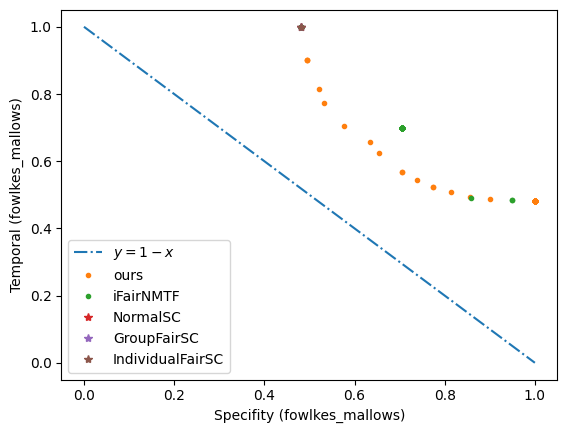

In [19]:
import matplotlib.pyplot as plt

for metric in SPECs_ours.keys():
    fig = plt.figure()
    plt.plot(np.linspace(0, 1, 100), 1 - np.linspace(0, 1, 100), '-.')
    plt.plot(SPECs_ours[metric], TEMPs_ours[metric], '.')
    plt.plot(SPECs_ifair[metric], TEMPs_ifair[metric], '.')
    plt.plot(SPECs_normalsc[metric], TEMPs_normalsc[metric], '*')
    plt.plot(SPECs_gfairsc[metric], TEMPs_gfairsc[metric], '*')
    plt.plot(SPECs_ifairsc[metric], TEMPs_ifairsc[metric], '*')

    # plt.xlim([0, 1])
    # plt.ylim([0, 1])
    plt.xlabel(f"Specifity ({metric})")
    plt.ylabel(f"Temporal ({metric})")
    plt.legend(["$y=1-x$", "ours", "iFairNMTF", "NormalSC", "GroupFairSC", "IndividualFairSC"])
    plt.savefig(f"temp_spec_compare_models_{metric}.pdf", bbox_inches='tight')

<hr>

In [20]:
import numpy as np
np.random.seed(0)
N1 = 200 # size of 1st cluster
N2 = 100 # size of 2nd cluster
N = N1 + N2
ONE_ONET = np.ones((N, N))

In [21]:
import numpy as np

lambda_ = 1
ONE_ONET = np.ones((N, N))
p_inter_range = (0, 0.5) # inter-cluster connection probablity
p_intera_range = (0.5, 1.0) # intera-cluster connection probability
s = np.random.choice([-1, 1], size=(N,)) # specificity vector

def get_random_sym_nonloop_adj_p_range(n, p):
    A = []
    for i in range(n):
        A.append([*[0]*i, *np.random.uniform(*p, (n-i,))])
    A = np.array(A)

    for i in range(n):
        for j in range(i+1, n):
            A[j, i] = A[i, j]
    return A

def get_random_inter_cluster(n, m, p):
    return np.random.uniform(*p, (n, m))

A0 = get_random_sym_nonloop_adj_p_range(N1, p_intera_range)
A1 = get_random_inter_cluster(N1, N2, p_inter_range)
A2 = get_random_sym_nonloop_adj_p_range(N2, p_intera_range)

A = np.block([
    [A0, A1],
    [A1.T, A2]
    ])
A = np.array(A, dtype=np.float32)
print(A)
print(s)

[[0.57472414 0.934063   0.5812465  ... 0.17235884 0.49099475 0.4493722 ]
 [0.934063   0.82278514 0.51768124 ... 0.16332693 0.2081185  0.00171784]
 [0.5812465  0.51768124 0.6669824  ... 0.07102551 0.4797     0.4560404 ]
 ...
 [0.17235884 0.16332693 0.07102551 ... 0.8658131  0.84307295 0.87969494]
 [0.49099475 0.2081185  0.4797     ... 0.84307295 0.79001737 0.7195301 ]
 [0.4493722  0.00171784 0.4560404  ... 0.87969494 0.7195301  0.9571797 ]]
[-1  1  1 -1  1  1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1
 -1  1  1  1  1 -1  1 -1  1 -1  1  1 -1  1  1 -1 -1  1 -1  1  1  1  1  1
 -1  1 -1  1  1  1  1 -1  1 -1 -1  1  1 -1  1 -1  1 -1 -1 -1 -1 -1  1  1
 -1 -1 -1  1  1 -1  1 -1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1 -1
 -1  1  1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1
  1  1  1  1  1 -1  1  1  1  1 -1  1  1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1
  1 -1  1  1  1  1 -1 -1 -1  1 -1  1  1  1 -1  1 -1 -1  1 -1  1  1 -1 -1
  1 -1  1 -1  1 -1  1 -1  1 -1 -1 -1  1 -1  1

Normal SC:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
Group Fair SC:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

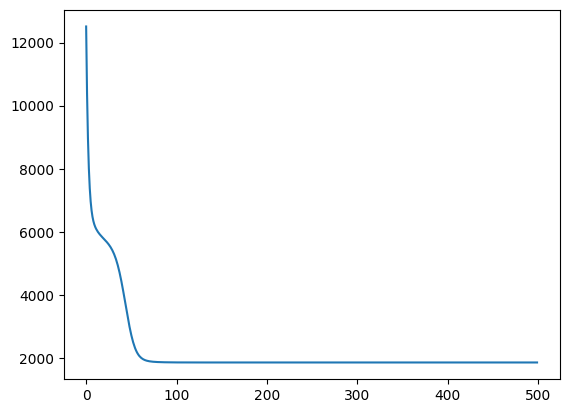

In [22]:
import torch

s_ = np.array((s+1)//2)
print("Normal SC:")
print(normal_sc(A, 2))
print("Group Fair SC:")
print(group_fair_sc(A, s_, 2))
print("Individual Fair SC:")
print(ind_fair_sc(A, s_, 2))
print("iFairNMTF:")
print(iFairNMTF(torch.from_numpy(A),
                torch.from_numpy(s_),
                2,
                0))
y_hat = fair_clustering_EVD(A, s, 1)
y_hat = np.array((y_hat+1)//2)
print("Ours:")
print(y_hat)

100%|██████████| 100/100 [00:17<00:00,  5.86it/s]


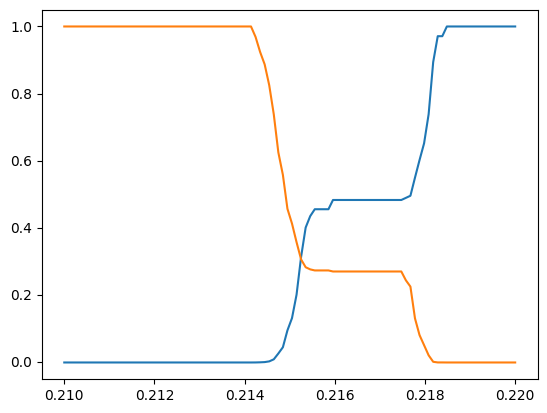

In [23]:
from tqdm import tqdm
LAMBDAS = np.linspace(0.21, 0.22, 100)
SPECs_ours = []
TEMPs_ours = []
for LAMBDA in tqdm(LAMBDAS):
    x = fair_clustering_EVD(A, s, mu=LAMBDA, lambda_=1)
    TEMPs_ours.append(clustring_eval(x, [*[1]*N1, *[-1]*N2])['adjusted_mutual_info'])
    SPECs_ours.append(clustring_eval(x, s)['adjusted_mutual_info'])
plt.plot(LAMBDAS, SPECs_ours)
plt.plot(LAMBDAS, TEMPs_ours)

/usr/local/lib/python3.10/dist-packages/numpy/core/function_base.py:298: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)
100%|██████████| 100/100 [00:47<00:00,  2.09it/s]


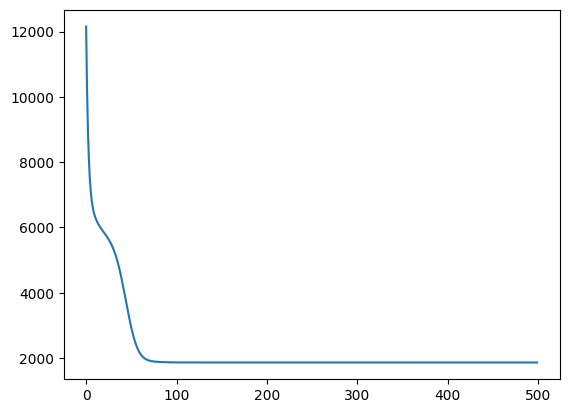

In [24]:
from tqdm import tqdm
LAMBDAS = np.logspace(10**-2, 10**10, 100)
SPECs_ifair = []
TEMPs_ifair = []
for LAMBDA in tqdm(LAMBDAS):
    x = iFairNMTF(torch.from_numpy(A),
                torch.from_numpy(s_),
                2,
                LAMBDA)
    TEMPs_ifair.append(clustring_eval(x, [*[1]*N1, *[-1]*N2])['adjusted_mutual_info'])
    SPECs_ifair.append(clustring_eval(x, s)['adjusted_mutual_info'])

In [25]:
x = normal_sc(A, 2)
TEMPs_normalsc = [clustring_eval(x, [*[1]*N1, *[-1]*N2])['adjusted_mutual_info']]
SPECs_normalsc = [clustring_eval(x, s)['adjusted_mutual_info']]

In [26]:
x = group_fair_sc(A, s_, 2)
TEMPs_gfairsc = [clustring_eval(x, [*[1]*N1, *[-1]*N2])['adjusted_mutual_info']]
SPECs_gfairsc = [clustring_eval(x, s)['adjusted_mutual_info']]

In [27]:
x = ind_fair_sc(A, s_, 2)
TEMPs_ifairsc = [clustring_eval(x, [*[1]*N1, *[-1]*N2])['adjusted_mutual_info']]
SPECs_ifairsc = [clustring_eval(x, s)['adjusted_mutual_info']]

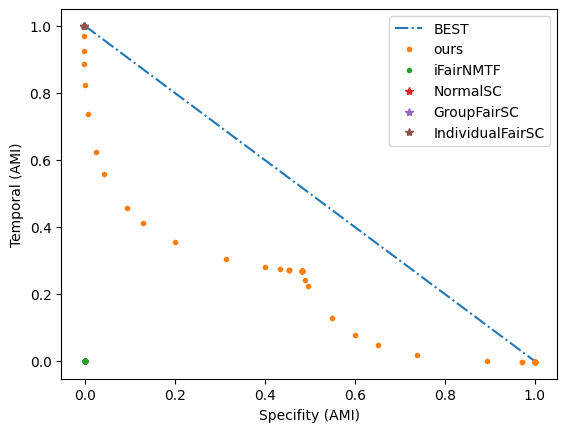

In [28]:
import matplotlib.pyplot as plt

plt.plot(np.linspace(0, 1, 100), 1 - np.linspace(0, 1, 100), '-.')
plt.plot(SPECs_ours, TEMPs_ours, '.')
plt.plot(SPECs_ifair, TEMPs_ifair, '.')
plt.plot(SPECs_normalsc, TEMPs_normalsc, '*')
plt.plot(SPECs_gfairsc, TEMPs_gfairsc, '*')
plt.plot(SPECs_ifairsc, TEMPs_ifairsc, '*')

# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.xlabel("Specifity (AMI)")
plt.ylabel("Temporal (AMI)")
plt.legend(["BEST", "ours", "iFairNMTF", "NormalSC", "GroupFairSC", "IndividualFairSC"])

<hr>

In [29]:
import numpy as np
np.random.seed(0)
N1 = 200 # size of 1st cluster
N2 = 100 # size of 2nd cluster
N = N1 + N2
ONE_ONET = np.ones((N, N))

In [30]:
import numpy as np

lambda_ = 1
ONE_ONET = np.ones((N, N))
p_inter_range = (0, 0.6) # inter-cluster connection probablity
p_intera_range = (0.4, 1.0) # intera-cluster connection probability
s = np.random.choice([-1, 1], size=(N,)) # specificity vector

def get_random_sym_nonloop_adj_p_range(n, p):
    A = []
    for i in range(n):
        A.append([*[0]*i, *np.random.uniform(*p, (n-i,))])
    A = np.array(A)

    for i in range(n):
        for j in range(i+1, n):
            A[j, i] = A[i, j]
    return A

def get_random_inter_cluster(n, m, p):
    return np.random.uniform(*p, (n, m))

A0 = get_random_sym_nonloop_adj_p_range(N1, p_intera_range)
A1 = get_random_inter_cluster(N1, N2, p_inter_range)
A2 = get_random_sym_nonloop_adj_p_range(N2, p_intera_range)

A = np.block([
    [A0, A1],
    [A1.T, A2]
    ])
A = np.array(A, dtype=np.float32)
print(A)
print(s)

[[0.489669   0.9208756  0.49749577 ... 0.2068306  0.5891937  0.5392466 ]
 [0.9208756  0.78734213 0.42121747 ... 0.19599232 0.2497422  0.00206141]
 [0.49749577 0.42121747 0.60037893 ... 0.08523061 0.57563996 0.5472485 ]
 ...
 [0.2068306  0.19599232 0.08523061 ... 0.83897567 0.8116876  0.8556339 ]
 [0.5891937  0.2497422  0.57563996 ... 0.8116876  0.7480208  0.6634361 ]
 [0.5392466  0.00206141 0.5472485  ... 0.8556339  0.6634361  0.9486157 ]]
[-1  1  1 -1  1  1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1
 -1  1  1  1  1 -1  1 -1  1 -1  1  1 -1  1  1 -1 -1  1 -1  1  1  1  1  1
 -1  1 -1  1  1  1  1 -1  1 -1 -1  1  1 -1  1 -1  1 -1 -1 -1 -1 -1  1  1
 -1 -1 -1  1  1 -1  1 -1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1 -1
 -1  1  1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1
  1  1  1  1  1 -1  1  1  1  1 -1  1  1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1
  1 -1  1  1  1  1 -1 -1 -1  1 -1  1  1  1 -1  1 -1 -1  1 -1  1  1 -1 -1
  1 -1  1 -1  1 -1  1 -1  1 -1 -1 -1  1 -1  1

sklearn.clustering.SpectralClustering
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
Normal SC:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

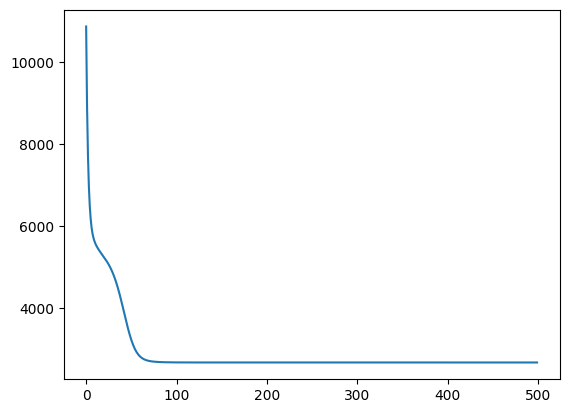

In [31]:
import torch
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(2, affinity='precomputed', n_init=100)
sc.fit(A)
print('sklearn.clustering.SpectralClustering')
print(sc.labels_)

s_ = np.array((s+1)//2)
print("Normal SC:")
print(normal_sc(A, 2))
print("Group Fair SC:")
print(group_fair_sc(A, s_, 2))
print("Individual Fair SC:")
print(ind_fair_sc(A, s_, 2))
print("iFairNMTF:")
print(iFairNMTF(torch.from_numpy(A),
                torch.from_numpy(s_),
                2,
                0))
y_hat = fair_clustering_EVD(A, s, 1)
y_hat = np.array((y_hat+1)//2)
print("Ours:")
print(y_hat)

100%|██████████| 100/100 [00:14<00:00,  6.71it/s]


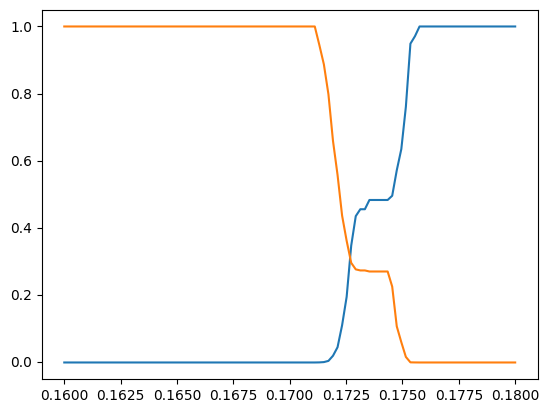

In [32]:
from tqdm import tqdm
LAMBDAS = np.linspace(0.16, 0.18, 100)
SPECs_ours = []
TEMPs_ours = []
for LAMBDA in tqdm(LAMBDAS):
    x = fair_clustering_EVD(A, s, mu=LAMBDA, lambda_=1)
    TEMPs_ours.append(clustring_eval(x, [*[1]*N1, *[-1]*N2])['adjusted_mutual_info'])
    SPECs_ours.append(clustring_eval(x, s)['adjusted_mutual_info'])
plt.plot(LAMBDAS, SPECs_ours)
plt.plot(LAMBDAS, TEMPs_ours)

100%|██████████| 100/100 [00:49<00:00,  2.02it/s]


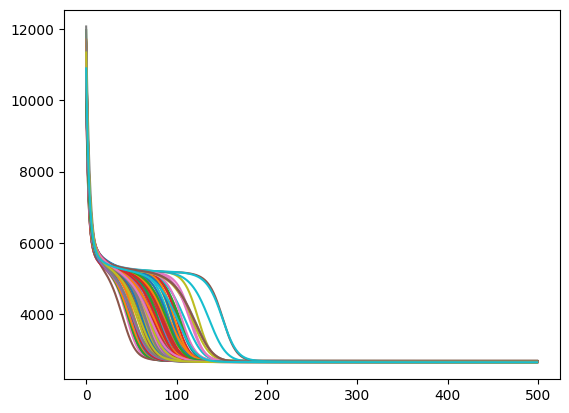

In [33]:
from tqdm import tqdm
LAMBDAS = np.linspace(0, 1000, 100)
SPECs_ifair = []
TEMPs_ifair = []
for LAMBDA in tqdm(LAMBDAS):
    x = iFairNMTF(torch.from_numpy(A),
                torch.from_numpy(s_),
                2,
                LAMBDA)
    TEMPs_ifair.append(clustring_eval(x, [*[1]*N1, *[-1]*N2])['adjusted_mutual_info'])
    SPECs_ifair.append(clustring_eval(x, s)['adjusted_mutual_info'])

In [34]:
x = normal_sc(A, 2)
TEMPs_normalsc = [clustring_eval(x, [*[1]*N1, *[-1]*N2])['adjusted_mutual_info']]
SPECs_normalsc = [clustring_eval(x, s)['adjusted_mutual_info']]

In [35]:
x = group_fair_sc(A, s_, 2)
TEMPs_gfairsc = [clustring_eval(x, [*[1]*N1, *[-1]*N2])['adjusted_mutual_info']]
SPECs_gfairsc = [clustring_eval(x, s)['adjusted_mutual_info']]

In [36]:
x = ind_fair_sc(A, s_, 2)
TEMPs_ifairsc = [clustring_eval(x, [*[1]*N1, *[-1]*N2])['adjusted_mutual_info']]
SPECs_ifairsc = [clustring_eval(x, s)['adjusted_mutual_info']]

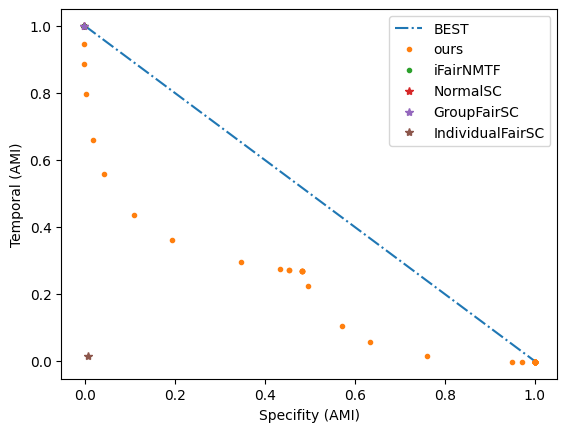

In [37]:
import matplotlib.pyplot as plt

plt.plot(np.linspace(0, 1, 100), 1 - np.linspace(0, 1, 100), '-.')
plt.plot(SPECs_ours, TEMPs_ours, '.')
plt.plot(SPECs_ifair, TEMPs_ifair, '.')
plt.plot(SPECs_normalsc, TEMPs_normalsc, '*')
plt.plot(SPECs_gfairsc, TEMPs_gfairsc, '*')
plt.plot(SPECs_ifairsc, TEMPs_ifairsc, '*')

# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.xlabel("Specifity (AMI)")
plt.ylabel("Temporal (AMI)")
plt.legend(["BEST", "ours", "iFairNMTF", "NormalSC", "GroupFairSC", "IndividualFairSC"])